In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import funcs_vis as fn_vis
import funcs_prep as fn_prep
import funcs_ml as fn_ml
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, LinearSVC
from nltk.tokenize import word_tokenize
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df_eclipse = pd.read_csv('data/eclipse_bug_report_data.csv')

In [3]:
df_eclipse.head()

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,status_category,status_code,update_date,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code,label
0,RECOMMENDERS-467951,2015-05-22,Core,RECOMMENDERS,LogTraceException in ProposalUtils.toMethodNam...,The following incident was reported via the au...,recommenders-inbox,error-reports-inbox,fixed,1,closed,6,2015-05-27,0,2,2015-05-27,5,normal,2,Functional
1,QVTO-463396,2015-03-29,Engine,QVTO,CCE in DecorationNodeImpl.eSet (159),CCE in DecorationNodeImpl.eSet (159),serg.boyko2011,error-reports-inbox,fixed,1,resolved,4,2015-04-01,0,8,2015-03-31,2,normal,2,Functional
2,EQUINOX-530069,2018-01-20,Compendium,EQUINOX,[http servlet] During dispatching javax.servle...,Original issue https://issues.liferay.com/brow...,raymond.auge,raymond.auge,fixed,1,resolved,4,2018-01-22,0,3,2018-01-22,2,normal,2,Infrastructure
3,NATTABLE-422482,2013-11-25,Core,NATTABLE,Left border of NatTable is not drawn,Rendering a NatTable on a Composite with margi...,dirk.fauth,dirk.fauth,fixed,1,closed,6,2014-07-23,0,3,2013-11-25,0,normal,2,Usability
4,WTP_JAVA_EE_TOOLS-116294,2005-11-14,jst.j2ee,WTP_JAVA_EE_TOOLS,NPE while importing EAR with utility jar,Import and EAR which has EJb and Ejb client tr...,jsholl,nagrawal,fixed,1,closed,6,2005-12-09,0,4,2005-11-15,1,blocker,6,Functional


In [4]:
df_eclipse.shape

(9609, 20)

In [5]:
df_eclipse.count()

bug_id                  9609
creation_date           9609
component_name          9609
product_name            9609
short_description       9609
long_description        9540
assignee_name           9609
reporter_name           9609
resolution_category     9609
resolution_code         9609
status_category         9609
status_code             9609
update_date             9609
quantity_of_votes       9609
quantity_of_comments    9609
resolution_date         9609
bug_fix_time            9609
severity_category       9609
severity_code           9609
label                    402
dtype: int64

In [6]:
df_eclipse = df_eclipse.dropna()

In [7]:
df_eclipse.count()

bug_id                  401
creation_date           401
component_name          401
product_name            401
short_description       401
long_description        401
assignee_name           401
reporter_name           401
resolution_category     401
resolution_code         401
status_category         401
status_code             401
update_date             401
quantity_of_votes       401
quantity_of_comments    401
resolution_date         401
bug_fix_time            401
severity_category       401
severity_code           401
label                   401
dtype: int64

In [8]:
df_mozilla = pd.read_csv('data/mozilla_bug_report_data.csv')

In [9]:
df_mozilla.head()

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,status_category,status_code,update_date,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code,label
0,BUGZILLA-294734,2005-05-18,Bugzilla-General,BUGZILLA,Emergency 2.16.10 Release,2.16.9 is broken -- many users can't enter bug...,mkanat,mkanat,fixed,1,resolved,4,2005-05-19,0,15,2005-05-19,1,blocker,6,Regression
1,OTHER_APPLICATIONS-363323,2006-12-09,DOM Inspector,OTHER_APPLICATIONS,DOM View is really inefficient with setting wh...,From comment in url:\n\nCurrent code:\nmenuite...,sdwilsh,sdwilsh,fixed,1,resolved,4,2011-06-01,0,8,2007-01-14,36,normal,2,Performance
2,SUPPORT.MOZILLA.ORG-398246,2007-10-02,General,SUPPORT.MOZILLA.ORG,Add support for custom cookies and cache headers,Adding support for custom headers and cookie n...,morgamic,morgamic,fixed,1,resolved,4,2009-11-02,0,23,2008-03-24,174,blocker,6,Functional
3,OTHER_APPLICATIONS-318859,2005-12-02,ChatZilla,OTHER_APPLICATIONS,DCC functionality in ChatZilla isn't functional.,User-Agent: Mozilla/5.0 (Macintosh U PPC...,gijskruitbosch+bugs,dafydd,fixed,1,resolved,4,2006-02-10,0,14,2005-12-07,5,normal,2,Functional
4,DEVELOPER.MOZILLA.ORG-416840,2008-02-11,General,DEVELOPER.MOZILLA.ORG,Fix and cruft,Since we removed the breadcrumbs and title-ove...,nobody,jorendorff,fixed,1,resolved,4,2012-09-18,0,4,2008-02-12,1,normal,2,Regression


In [10]:
df_mozilla.shape

(9950, 20)

In [11]:
df_mozilla.count()

bug_id                  9950
creation_date           9950
component_name          9950
product_name            9950
short_description       9949
long_description        9872
assignee_name           9950
reporter_name           9950
resolution_category     9950
resolution_code         9950
status_category         9950
status_code             9950
update_date             9950
quantity_of_votes       9950
quantity_of_comments    9950
resolution_date         9950
bug_fix_time            9950
severity_category       9950
severity_code           9950
label                    359
dtype: int64

In [12]:
df_mozilla = df_mozilla.dropna()

In [13]:
df_mozilla.count()

bug_id                  359
creation_date           359
component_name          359
product_name            359
short_description       359
long_description        359
assignee_name           359
reporter_name           359
resolution_category     359
resolution_code         359
status_category         359
status_code             359
update_date             359
quantity_of_votes       359
quantity_of_comments    359
resolution_date         359
bug_fix_time            359
severity_category       359
severity_code           359
label                   359
dtype: int64

<h2><b>Data Visualization</b></h2>

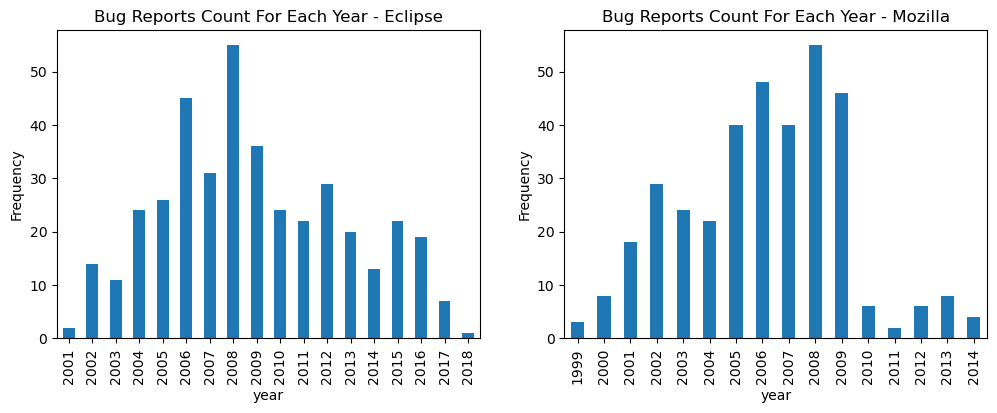

In [14]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
fn_vis.year_plot(df_eclipse, "Eclipse")

plt.subplot(1,2,2)
fn_vis.year_plot(df_mozilla, "Mozilla")

plt.show()

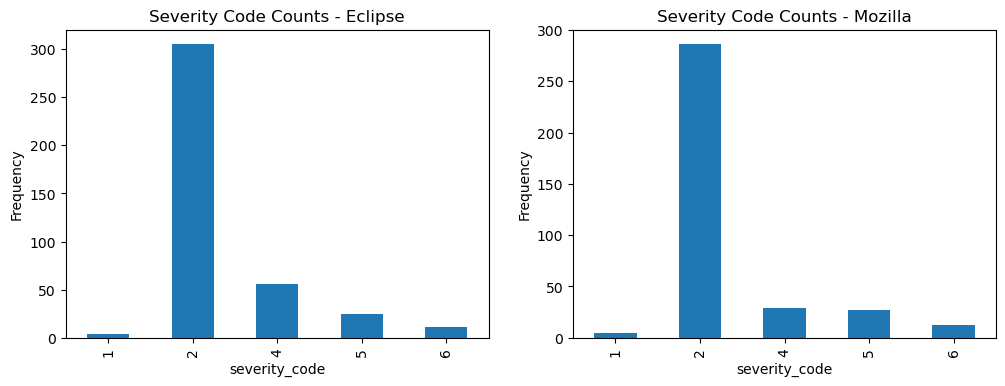

In [15]:
df_eclipse['severity_code'] = df_eclipse['severity_code'].astype(int)

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
fn_vis.severity_plot(df_eclipse, "Eclipse")

plt.subplot(1,2,2)
fn_vis.severity_plot(df_mozilla, "Mozilla")
plt.show()

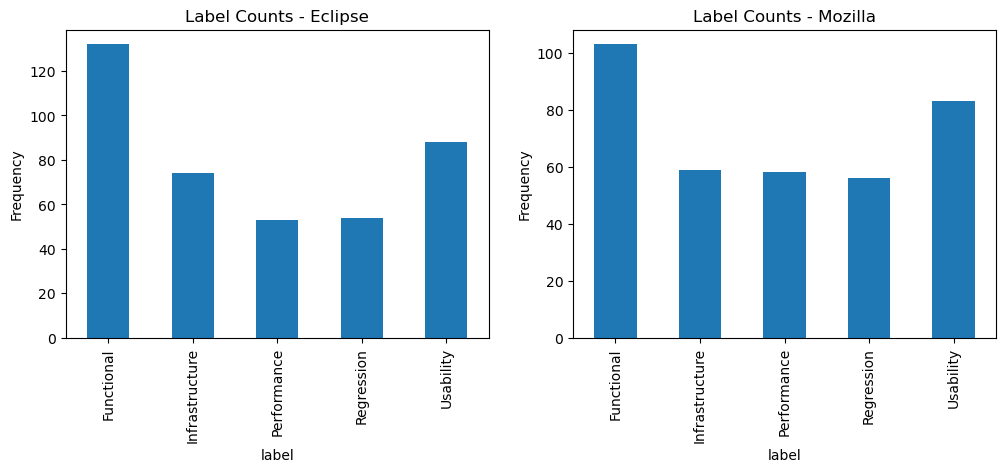

In [16]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
fn_vis.label_plot(df_eclipse, "Eclipse")

plt.subplot(1,2,2)
fn_vis.label_plot(df_mozilla, "Mozilla")
plt.show()

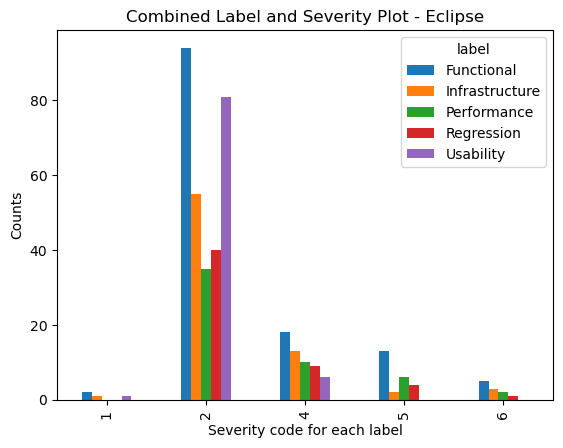

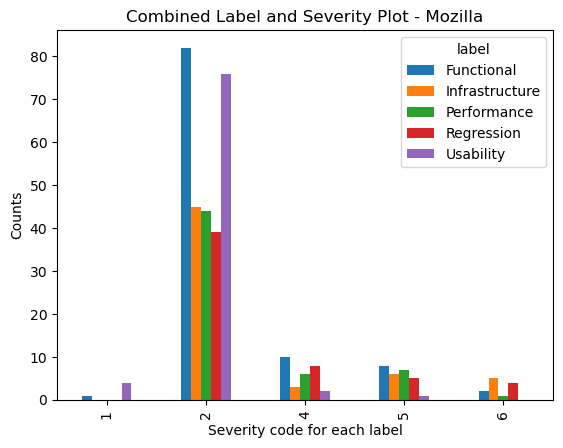

In [17]:
fn_vis.label_sev_plot(df_eclipse, "Eclipse")
fn_vis.label_sev_plot(df_mozilla, "Mozilla")

<h2><b>Data Preparation</b></h2>

In [18]:
df_eclipse = df_eclipse.drop(columns=['bug_id', 'component_name','product_name','creation_date','assignee_name','reporter_name','resolution_category',
                              'resolution_code','status_category','status_code','update_date',
                             'quantity_of_votes','quantity_of_comments','resolution_date',
                             'severity_category'])

df_mozilla = df_mozilla.drop(columns=['bug_id', 'component_name','product_name','creation_date','assignee_name','reporter_name','resolution_category',
                              'resolution_code','status_category','status_code','update_date',
                             'quantity_of_votes','quantity_of_comments','resolution_date',
                             'severity_category'])

In [19]:
eclipse_enc = pd.get_dummies(df_eclipse, columns=['label'])
eclipse_enc.head()

,short_description,long_description,bug_fix_time,severity_code,label_Functional,label_Infrastructure,label_Performance,label_Regression,label_Usability
0,LogTraceException in ProposalUtils.toMethodNam...,The following incident was reported via the au...,5,2,True,False,False,False,False
1,CCE in DecorationNodeImpl.eSet (159),CCE in DecorationNodeImpl.eSet (159),2,2,True,False,False,False,False
2,[http servlet] During dispatching javax.servle...,Original issue https://issues.liferay.com/brow...,2,2,False,True,False,False,False
3,Left border of NatTable is not drawn,Rendering a NatTable on a Composite with margi...,0,2,False,False,False,False,True
4,NPE while importing EAR with utility jar,Import and EAR which has EJb and Ejb client tr...,1,6,True,False,False,False,False


In [20]:
mozilla_enc = pd.get_dummies(df_mozilla, columns=['label'])
mozilla_enc.head()

,short_description,long_description,bug_fix_time,severity_code,label_Functional,label_Infrastructure,label_Performance,label_Regression,label_Usability
0,Emergency 2.16.10 Release,2.16.9 is broken -- many users can't enter bug...,1,6,False,False,False,True,False
1,DOM View is really inefficient with setting wh...,From comment in url:\n\nCurrent code:\nmenuite...,36,2,False,False,True,False,False
2,Add support for custom cookies and cache headers,Adding support for custom headers and cookie n...,174,6,True,False,False,False,False
3,DCC functionality in ChatZilla isn't functional.,User-Agent: Mozilla/5.0 (Macintosh U PPC...,5,2,True,False,False,False,False
4,Fix and cruft,Since we removed the breadcrumbs and title-ove...,1,2,False,False,False,True,False


In [21]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vasav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [23]:
combined_df = pd.concat([eclipse_enc, mozilla_enc],axis = 0)

In [24]:
combined_df = fn_prep.prepare_df(combined_df, lemmatizer, stop_words)

In [25]:
combined_df.head()

,bug_fix_time,severity_code,label_Functional,label_Infrastructure,label_Performance,label_Regression,label_Usability,description,word_count_desc
0,5,2,True,False,False,False,False,logtraceexception proposalutilstomethodname 89...,101
1,2,2,True,False,False,False,False,cce decorationnodeimpleset 159 cce decorationn...,6
2,2,2,False,True,False,False,False,http servlet dispatching javaxservletincludeco...,13
3,0,2,False,False,False,False,True,left border nattable drawn rendering nattable ...,30
4,1,6,True,False,False,False,False,npe importing ear utility jar import ear ejb e...,62


<h2><b>Classification</b></h2>

<h3><i>TFIDF</i></h3>

In [62]:
df_vec1 = fn_prep.vectorizer(combined_df, 'description', 20, 2000)

In [63]:
final_df = fn_prep.processed_df(combined_df, df_vec1)

In [64]:
X = final_df.drop(columns=['label_Functional','label_Infrastructure','label_Performance',
                              'label_Regression','label_Usability'])
y = final_df[['label_Functional','label_Infrastructure','label_Performance',
                              'label_Regression','label_Usability']].idxmax(axis=1)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) 

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
smoter = SMOTETomek(random_state=42)
X_final, y_final = smoter.fit_resample(X_train_scaled, y_train)

<h4>Logistic Regression</h4>

In [68]:
model_lg = LogisticRegression(C=10, class_weight='balanced', multi_class='multinomial',penalty='l1', solver='saga', max_iter=40000)
fn_ml.classify(model_lg, X_train_scaled, y_train, X_test_scaled, y_test)

              precision    recall  f1-score   support

           0       0.49      0.42      0.45        43
           1       0.55      0.50      0.52        32
           2       0.61      0.82      0.70        17
           3       0.65      0.65      0.65        31
           4       0.56      0.62      0.59        29

    accuracy                           0.57       152
   macro avg       0.57      0.60      0.58       152
weighted avg       0.56      0.57      0.56       152



In [69]:
# lg_param_grid = {
#     'C': [1, 10, 100], 
#     'penalty': ['l1', 'l2'],
#     'solver': ['lbfgs', 'saga', 'newton-cg']
# }
# fn_ml.grid_search(LogisticRegression(multi_class='multinomial', max_iter=3000), X_final, y_final, X_test_scaled, y_test, lg_param_grid)

In [70]:
# fn_ml.cv(model_lg, X, y)

<h4>Random Forest</h4>

In [71]:
model_rf = RandomForestClassifier(n_estimators=1000,class_weight='balanced',random_state=42)
fn_ml.classify(model_rf, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.35      0.63      0.45        43
           1       0.45      0.31      0.37        32
           2       0.77      0.59      0.67        17
           3       0.73      0.35      0.48        31
           4       0.56      0.48      0.52        29

    accuracy                           0.47       152
   macro avg       0.57      0.47      0.50       152
weighted avg       0.54      0.47      0.48       152



In [72]:
# rf_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4], 
#     'bootstrap': [True, False] 
# }
# fn_ml.grid_search(RandomForestClassifier(), X_final, y_final, X_test_scaled, y_test, rf_param_grid)

In [73]:
# fn_ml.cv(model_rf, X, y)

<h4>Support Vector Machine</h4>

In [74]:
model_svm = SVC(C=10, degree=2, gamma='scale', kernel='rbf')
fn_ml.classify(model_svm, X_train_scaled, y_train, X_test_scaled, y_test)

              precision    recall  f1-score   support

           0       0.40      0.49      0.44        43
           1       0.35      0.25      0.29        32
           2       0.65      0.65      0.65        17
           3       0.56      0.48      0.52        31
           4       0.52      0.59      0.55        29

    accuracy                           0.47       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.47      0.47      0.47       152



In [75]:
# svm_param_grid = {
#     'C': [1, 10, 100],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto'],
#     'degree': [2, 3, 4] 
# }
# fn_ml.grid_search(SVC(), X_final, y_final, X_test_scaled, y_test, svm_param_grid)

In [76]:
# fn_ml.cv(model_svm, X_final, y_final)

<h3><i>Word2Vec</i></h3>

In [77]:
w2v_df = combined_df.copy()
w2v_df['tokens'] = w2v_df['description'].apply(lambda x: word_tokenize(x))
word2vec_model = fn_prep.w2v(w2v_df, vector_size=100, window=100)
w2v_df['embedding'] = w2v_df['tokens'].apply(lambda x: fn_prep.embeddings(x, word2vec_model))

In [99]:
embeds = np.vstack(w2v_df['embedding'].values)
from sklearn.decomposition import PCA

# Assuming 'embeddings' is your Word2Vec embeddings matrix
pca = PCA(n_components=30)  # Reduce to 50 dimensions
embs = pca.fit_transform(embeds)


X_w2v = w2v_df.drop(columns=['label_Functional','label_Infrastructure','label_Performance',
                              'label_Regression','label_Usability','tokens', 'description',
                             'embedding'])
y_w2v = w2v_df[['label_Functional','label_Infrastructure','label_Performance',
                              'label_Regression','label_Usability']].idxmax(axis=1)

X_w2v = np.hstack((embs, X_w2v))
y_w2v = encoder.transform(y_w2v)

In [100]:
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w2v, y_w2v, random_state=42, test_size=0.2)

In [101]:
scaler_w = StandardScaler()
X_w_train_scaled = scaler_w.fit_transform(X_w_train)
X_w_test_scaled = scaler_w.transform(X_w_test)

In [102]:
smoter_w = SMOTETomek(random_state=42)
X_w_final, y_w_final = smoter_w.fit_resample(X_w_train_scaled, y_w_train)

<h4>Logistic Regression</h4>

In [103]:
mod_lg = LogisticRegression(class_weight='balanced', multi_class='multinomial', penalty='l1', solver='saga', max_iter=30000)
fn_ml.classify(mod_lg, X_w_train_scaled, y_w_train, X_w_test_scaled, y_w_test)

              precision    recall  f1-score   support

           0       0.45      0.21      0.29        43
           1       0.38      0.44      0.41        32
           2       0.39      0.71      0.50        17
           3       0.62      0.65      0.63        31
           4       0.50      0.55      0.52        29

    accuracy                           0.47       152
   macro avg       0.47      0.51      0.47       152
weighted avg       0.47      0.47      0.45       152



<h4>Random Forest</h4>

In [104]:
mod_rf = RandomForestClassifier(n_estimators=1000, random_state=42,class_weight='balanced')
fn_ml.classify(mod_rf, X_w_train, y_w_train, X_w_test, y_w_test)

              precision    recall  f1-score   support

           0       0.32      0.72      0.44        43
           1       0.41      0.22      0.29        32
           2       0.67      0.47      0.55        17
           3       0.67      0.19      0.30        31
           4       0.53      0.31      0.39        29

    accuracy                           0.40       152
   macro avg       0.52      0.38      0.39       152
weighted avg       0.49      0.40      0.38       152



<h4>Support Vector Machine</h4>

In [105]:
mod_svm = SVC(C=10, degree=2, gamma='scale', kernel='rbf')
fn_ml.classify(mod_svm, X_w_train_scaled, y_w_train, X_w_test_scaled, y_w_test)

              precision    recall  f1-score   support

           0       0.34      0.47      0.39        43
           1       0.35      0.25      0.29        32
           2       0.43      0.59      0.50        17
           3       0.74      0.45      0.56        31
           4       0.39      0.38      0.39        29

    accuracy                           0.41       152
   macro avg       0.45      0.43      0.43       152
weighted avg       0.44      0.41      0.42       152



<h3><i>Bag of Words</i></h3>

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
df_bow = combined_df.drop(columns=['label_Functional','label_Infrastructure','label_Performance',
                              'label_Regression','label_Usability', 'description'])

y_bow = combined_df[['label_Functional','label_Infrastructure','label_Performance',
                              'label_Regression','label_Usability']].idxmax(axis=1)

y_bow = encoder.transform(y_bow)

In [120]:
vectorizer = CountVectorizer(max_features=500)

In [121]:
X_bow = np.hstack((df_bow, vectorizer.fit_transform(combined_df['description']).toarray()))

In [122]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_bow, random_state=42, test_size=0.2)

In [123]:
sc_bow = StandardScaler()
X_train_bow_scaled = sc_bow.fit_transform(X_train_bow)
X_test_bow_scaled = sc_bow.transform(X_test_bow)

In [124]:
bow_lg = LogisticRegression(class_weight='balanced', solver='saga', penalty='l1', max_iter=30000, multi_class='multinomial')
fn_ml.classify(bow_lg, X_train_bow_scaled, y_train_bow, X_test_bow_scaled, y_test)

              precision    recall  f1-score   support

           0       0.47      0.47      0.47        43
           1       0.47      0.47      0.47        32
           2       0.57      0.71      0.63        17
           3       0.70      0.52      0.59        31
           4       0.42      0.48      0.45        29

    accuracy                           0.51       152
   macro avg       0.53      0.53      0.52       152
weighted avg       0.52      0.51      0.51       152



In [125]:
bow_rf = RandomForestClassifier(n_estimators=1000, random_state=42,class_weight='balanced')
fn_ml.classify(bow_rf,X_train_bow_scaled, y_train_bow, X_test_bow_scaled, y_test)

              precision    recall  f1-score   support

           0       0.38      0.60      0.46        43
           1       0.44      0.38      0.41        32
           2       0.79      0.65      0.71        17
           3       0.95      0.65      0.77        31
           4       0.71      0.52      0.60        29

    accuracy                           0.55       152
   macro avg       0.65      0.56      0.59       152
weighted avg       0.62      0.55      0.57       152



In [126]:
X_bow.shape

(760, 503)

<h3><i>Combined</i></h3>

In [127]:
# test
bean = X.drop(columns=['bug_fix_time', 'severity_code', 'word_count_desc'])
x_trial = np.hstack((X_w2v, bean, X_bow[:,3:]))

In [128]:
a,b,c,d = train_test_split(x_trial, y_w2v, random_state=42, test_size=0.2)

In [129]:
sc = StandardScaler()
o = sc.fit_transform(a)
h = sc.transform(b)

In [130]:
r1 = LogisticRegression(class_weight='balanced', multi_class='multinomial', penalty='l1', solver='saga', max_iter=30000)
fn_ml.classify(r1, o,c,h,d)

              precision    recall  f1-score   support

           0       0.49      0.51      0.50        43
           1       0.48      0.50      0.49        32
           2       0.71      0.71      0.71        17
           3       0.77      0.55      0.64        31
           4       0.43      0.52      0.47        29

    accuracy                           0.54       152
   macro avg       0.58      0.56      0.56       152
weighted avg       0.56      0.54      0.54       152



In [131]:
r = RandomForestClassifier(n_estimators=1000, random_state=42, class_weight='balanced')
fn_ml.classify(r, o,c,h,d)

              precision    recall  f1-score   support

           0       0.39      0.65      0.49        43
           1       0.53      0.31      0.39        32
           2       0.73      0.65      0.69        17
           3       0.83      0.65      0.73        31
           4       0.64      0.48      0.55        29

    accuracy                           0.55       152
   macro avg       0.62      0.55      0.57       152
weighted avg       0.59      0.55      0.55       152



In [132]:
s = SVC(C=10, degree=2, gamma='scale', kernel='rbf')
fn_ml.classify(s, o,c,h,d)

              precision    recall  f1-score   support

           0       0.36      0.63      0.46        43
           1       0.48      0.38      0.42        32
           2       0.64      0.41      0.50        17
           3       0.87      0.42      0.57        31
           4       0.56      0.52      0.54        29

    accuracy                           0.49       152
   macro avg       0.58      0.47      0.50       152
weighted avg       0.56      0.49      0.49       152

